<a href="https://colab.research.google.com/github/valeriopagliarino/Electronics-2021-UNITO/blob/main/analysis/1_Introduction_and_OPA_amplifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis: Introduction and OPA amplifiers
### October 4th 2021
<p>
Authors: <b> Stefano Barbero, Valerio Pagliarino, Matteo Barbagiovanni, Federico Malnati </b> <p>Electronics Laboratory 2021 - Department of Physics - University of Turin <p>
Date: 04/10/2021

1. Instrumentation configuration
2. Probe compensation
3. Half-wave diode rectifier
4. OPA zero crossing 
5. OPA inverting zero crossing
6. OPA slew rate frequency sweep
7. OPA open ring biased threshold
8. OPA closed loop non inverting G = 2
9. OPA closed loop non inverting G = 10
10. OPA closed loop inverting bode plots for G = 1
11. OPA closed loop inverting bode plots for G = 10

OPA: LM471CV (https://www.ti.com/lit/ds/symlink/lm741.pdf)


## Configuration

### Clone the GIT

### Importa moduli [no COLAB]

In [1]:
import numpy as np
import scipy as sp
import sympy as sy
import pandas as pd

from matplotlib import pyplot as plt

from uncertainties import ufloat
import uncertainties.umath

import pickle

import ROOT # Per COLAB importato da ROOT-config.py

DATADIR = "../data-source"
OUTPUTDIR = "./output"

Welcome to JupyROOT 6.24/06


### Funzioni per l'importazione file Tektronix

In [2]:
import csv

def cellFromCSV(path, row_index, col_index):
  with open(path, 'r') as f:
    mycsv = csv.reader(f)
    column = []
    for row in mycsv:
        column.append(row[col_index])

  return column[row_index]


def openTek(path):
  a = pd.read_table(path, header=None, sep=",", usecols=[3,4])
  a = a.transpose()
  a = a.rename(index={3: 'Time', 4: 'Amplitude'})
  a = a.transpose()

  data = {'Record lenght': cellFromCSV(path, 0, 1),
          'Sample interval': cellFromCSV(path, 1, 1),
          'Trigger point': cellFromCSV(path, 2, 1),
          'Source': cellFromCSV(path, 6, 1),
          'Vertical units': cellFromCSV(path, 7, 1),
          'Vertical scale': cellFromCSV(path, 8, 1),
          'Vertical offset': cellFromCSV(path, 9, 1),
          'Horizontal units': cellFromCSV(path, 10, 1),
          'Horizontal scale': cellFromCSV(path, 11, 1),
          'Pt FMT': cellFromCSV(path, 12, 1),
          'Y zero': cellFromCSV(path, 13, 1),
          'Probe atten': cellFromCSV(path, 14, 1),
          'Model': cellFromCSV(path, 15, 1),
          'Serial': cellFromCSV(path, 16, 1),
          'Firmware': cellFromCSV(path, 17, 1),
          'Data' : a
  }
  return data

## Half-wave rectifier

## OPA open-loop non-inverting zero-crossing detector

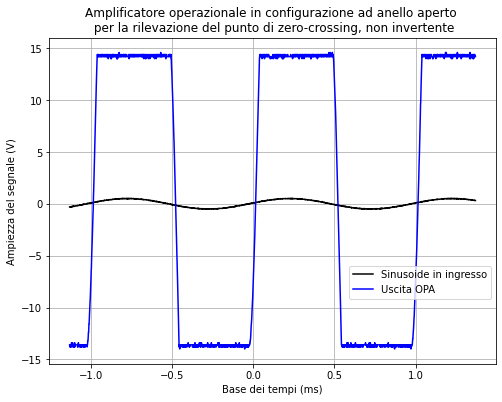

In [3]:
ch1_f = openTek(f'{DATADIR}/4-10-21/OPA_zero_crossing/F0007CH1.CSV')
ch2_f = openTek(f'{DATADIR}/4-10-21/OPA_zero_crossing/F0007CH2.CSV')

time1 = ch1_f['Data'].to_numpy().transpose()[0] * 1000
ch1   = ch1_f['Data'].to_numpy().transpose()[1]
time2 = ch2_f['Data'].to_numpy().transpose()[0] * 1000
ch2   = ch2_f['Data'].to_numpy().transpose()[1]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time1, ch1, color = "black", label = "Sinusoide in ingresso")
ax.plot(time2, ch2, color = "blue", label = "Uscita OPA")



ax.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (V)',
       title='Amplificatore operazionale in configurazione ad anello aperto \n per la rilevazione del punto di zero-crossing, non invertente')

ax.grid()
ax.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))

plt.savefig(f"{OUTPUTDIR}/OPA-open-loop-non-inv-zero-crossing.pdf")

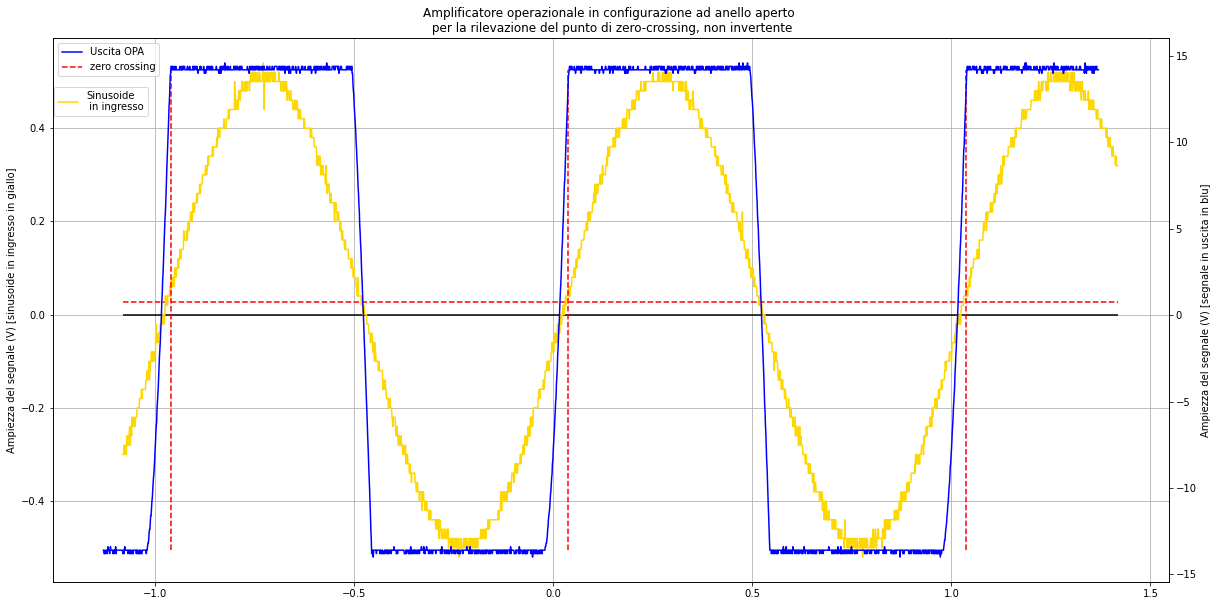

In [4]:
ch1_f = openTek(f'{DATADIR}/4-10-21/OPA_zero_crossing/F0007CH1.CSV')
ch2_f = openTek(f'{DATADIR}/4-10-21/OPA_zero_crossing/F0007CH2.CSV')

time1 = ch1_f['Data'].to_numpy().transpose()[0] * 1000
ch1   = ch1_f['Data'].to_numpy().transpose()[1]
time2 = ch2_f['Data'].to_numpy().transpose()[0] * 1000
ch2   = ch2_f['Data'].to_numpy().transpose()[1]

time1 += 0.049

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time1, ch1, color = "gold", label = "Sinusoide\n in ingresso")
ax2 = ax.twinx()
ax2.plot(time2, ch2, color = "blue", label = "Uscita OPA")

ax2.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (V) [segnale in uscita in blu]',
       title='Amplificatore operazionale in configurazione ad anello aperto \n per la rilevazione del punto di zero-crossing, non invertente')

ax.grid()
#ax2.grid()
ax.set(ylabel='Ampiezza del segnale (V) [sinusoide in ingresso in giallo]')
#ax.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#ax2.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))

ax.hlines(0, time1[0], time1[-1], linestyle="solid", color="black")

ax.hlines(0.028, time1[0], time1[-1], linestyle='--', color='red')
ax2.vlines(-0.96, ch2[0], ch2[-1], linestyle='--', color='red')
ax2.vlines(0.036, ch2[0], ch2[-1], linestyle='--', color='red')
ax2.vlines(1.037, ch2[0], ch2[-1], linestyle='--', color='red', label='zero crossing')

ax.legend(bbox_to_anchor=(0.09, 0.92))
ax2.legend()


plt.savefig(f"{OUTPUTDIR}/OPA-open-loop-non-inv-zero-crossing-z2.pdf")

In [5]:
def sim(l1, val):
    diff = []
    for i in l1:
        diff.append(abs(i - val))
    
    diffarr = np.array(diff)
    return diff.index(diffarr.min())

In [6]:
ch1_f = openTek(f'{DATADIR}/4-10-21/OPA_zero_crossing_inverting/F0013CH1.CSV')
ch2_f = openTek(f'{DATADIR}/4-10-21/OPA_zero_crossing_inverting/F0013CH2.CSV')

time1 = ch1_f['Data'].to_numpy().transpose()[0] * 1000
ch1   = ch1_f['Data'].to_numpy().transpose()[1]
time2 = ch2_f['Data'].to_numpy().transpose()[0] * 1000
ch2   = ch2_f['Data'].to_numpy().transpose()[1]


In [7]:
i1, i2 = sim(ch1, 0), sim(ch2,0)
difftime = time2[i2] - time1[i1]

time1 += difftime

In [8]:
def get_start(xlist, ylist):
    counts = {}
    for i,j in enumerate(xlist):
        c = 0
        while(i+c+1 < len(xlist) and ylist[i+c+1] > ylist[i] and ylist[i] > 0):
            c+=1
        counts[(i,j)]= c
    
    return counts

d = get_start(time2, ch2)
edges = [i for i in d.keys() if d[i] > 200]


y_val_start1 = ch1[146]
y_val_start2 = ch1[1146]
y_val_start3 = ch1[2146]
y_val_start3
edges

ch2.max(), ch2.min()


(14.6, -14.0)

In [9]:
high_thr = []

for index,value in enumerate(time2):
    if(value > -0.4 and value < 0.1):
        if(ch2[index] > 14.1):
            high_thr.append(ch2[index])

len(high_thr)

440

In [10]:
low_thr = []

for index,value in enumerate(time2):
    if(value > -0.9 and value < -0.4):
        if(ch2[index] < -13.5):
            low_thr.append(ch2[index])

len(low_thr)

432

In [11]:
high_thr_list = np.array([j for i,j in enumerate(time2) if(j > 0.6 and j< 1.1 and ch2[i] > 14.1) ])
high_thr_list_ind = np.array([i for i,j in enumerate(time2) if(j > -0.6 and j< 1.1 and ch2[i] > 14.1) ])
high_thr_list.min(), high_thr_list_ind.min(), sim(time1, high_thr_list.min()), ch1[sim(time1, high_thr_list.min())]

(0.612, 742, 1693, -0.048)

In [12]:
low_thr_list = np.array([j for i,j in enumerate(time2) if(j > 0.1 and j< 0.6 and ch2[i] < 13.5) ])
low_thr_list_ind = np.array([i for i,j in enumerate(time2) if(j > 0.1 and j< 0.6 and ch2[i] < 13.5) ])
low_thr_list.min(),  low_thr_list_ind.min(), sim(time1, low_thr_list.min()), ch1[sim(time1, low_thr_list.min())]

(0.101, 1231, 1182, 0.032)

In [13]:
sa1 = ufloat(-0.048, 0.02)
sa2 = ufloat(-0.048, 0.02)
sb1 = ufloat(0.032, 0.02)
sb2 = ufloat(0.024, 0.02)

ma = (sa1 + sa2)/2
mb = (sb1 + sb2)/2

ma,mb

(-0.048+/-0.01414213562373095, 0.028+/-0.01414213562373095)

## OPA open-loop inverting zero-crossing detector

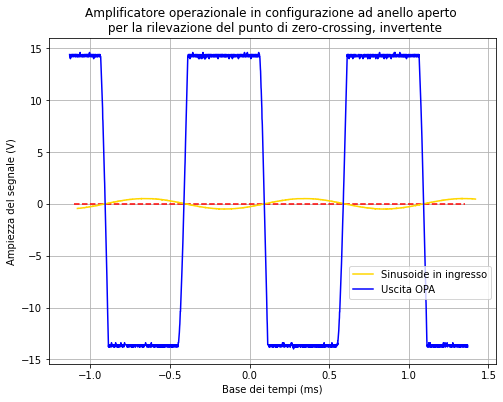

In [14]:


fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(time1, ch1, color = "gold", label = "Sinusoide in ingresso")
ax.plot(time2, ch2, color = "blue", label = "Uscita OPA")

ax.hlines(0, -1.1, 1.35, linestyle = "--", color="red")

ax.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (V)',
       title='Amplificatore operazionale in configurazione ad anello aperto \n per la rilevazione del punto di zero-crossing, invertente')

ax.grid()
ax.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))

plt.savefig(f"{OUTPUTDIR}/OPA-open-loop-inv-zero-crossing.pdf")

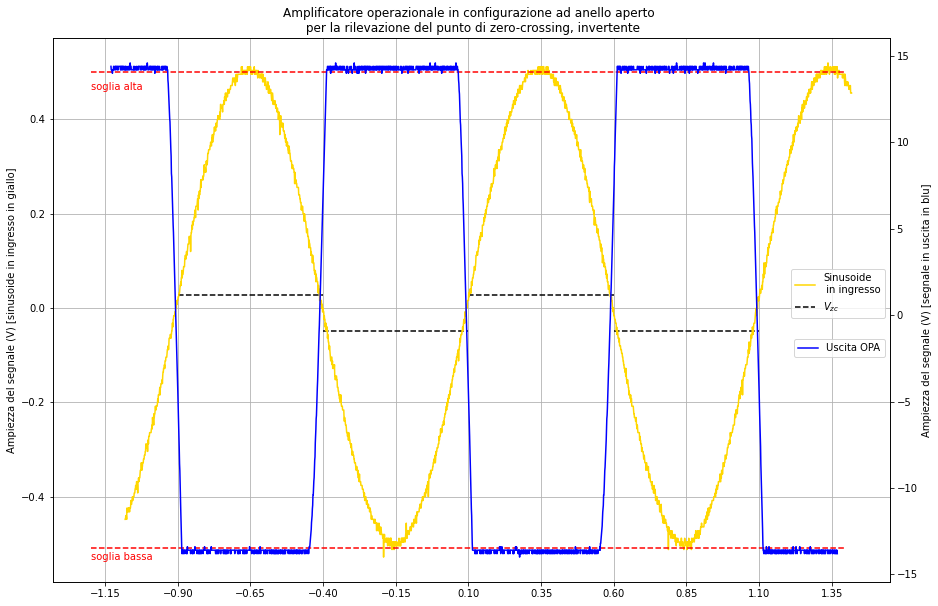

In [15]:


fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(time1, ch1, color = "gold", label = "Sinusoide\n in ingresso")
ax2 = ax.twinx()
ax2.plot(time2, ch2, color = "blue", label = "Uscita OPA")

ax2.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (V) [segnale in uscita in blu]',
       title='Amplificatore operazionale in configurazione ad anello aperto \n per la rilevazione del punto di zero-crossing, invertente')

ax2.hlines(14.1, -1.2, 1.4, linestyle = "--", color="red")
ax2.text(-1.2, 13.5, 'soglia alta',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=10)

ax2.hlines(-13.5, -1.2, 1.4, linestyle = "--", color="red")
ax2.text(-1.2, -13.7, 'soglia bassa',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=10)

ax.hlines(-0.048, -0.4, 0.1, linestyle='--', color='black')
ax.hlines(-0.048, 0.6, 1.1, linestyle='--', color='black')

ax.hlines(0.028, -0.9, -0.4, linestyle='--', color='black')
ax.hlines(0.028, 0.1, 0.6, linestyle='--', color='black', label="$V_{zc}$")

ax.grid()
#ax2.grid()
ax.set(ylabel='Ampiezza del segnale (V) [sinusoide in ingresso in giallo]')
ax.legend(loc='center right', bbox_to_anchor=(1, 0.53))
ax2.legend(loc = 'center right', bbox_to_anchor=(1, 0.43))

ax2.set_xticks(np.arange(-1.15, 1.55, 0.25))


plt.savefig(f"{OUTPUTDIR}/OPA-open-loop-inv-zero-crossing-z2.pdf")

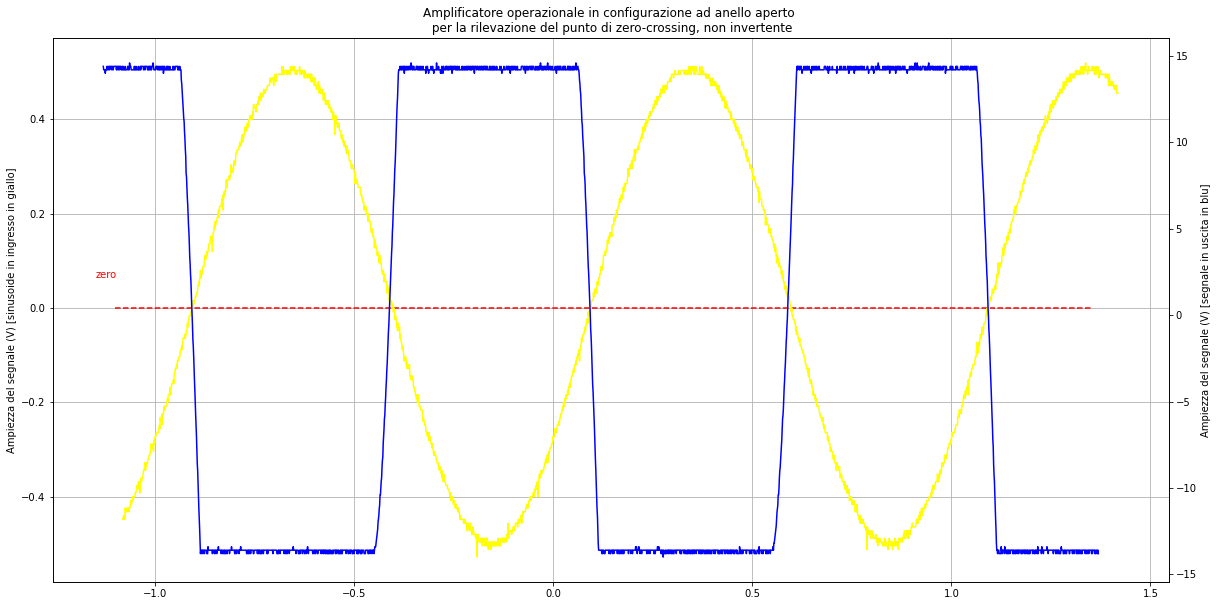

In [16]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time1, ch1, color = "yellow", label = "Sinusoide in ingresso")
ax2 = ax.twinx()
ax2.plot(time2, ch2, color = "blue", label = "Uscita OPA")

ax2.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (V) [segnale in uscita in blu]',
       title='Amplificatore operazionale in configurazione ad anello aperto \n per la rilevazione del punto di zero-crossing, non invertente')

ax.hlines(0, -1.1, 1.35, linestyle = "--", color="red")
ax.text(-1.15, 0.08, 'zero',
        verticalalignment='top', horizontalalignment='left',
        color='red', fontsize=10)

ax.grid()
#ax2.grid()
ax.set(ylabel='Ampiezza del segnale (V) [sinusoide in ingresso in giallo]')
#ax.legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
#ax2.legend(bbox_to_anchor=(0.5, 0.1, 0.5, 0.5))

#ax2.vlines(0.0036, ch2.min(), ch2.max(), linestyle='solid', color='black')
#ax.hlines(0.12, time1[0], time1[-1], linestyle='solid', color='black')



plt.savefig(f"{OUTPUTDIR}/OPA-open-loop-inv-zero-crossing-z3.pdf")

In [17]:
def get_start(xlist, ylist):
    counts = {}
    for i,j in enumerate(xlist):
        c = 0
        while(i+c+1 < len(xlist) and ylist[i+c+1] > ylist[i] and ylist[i] > 0):
            c+=1
        counts[(i,j)]= c
    
    return counts

d = get_start(time2, ch2)
edges = [i for i in d.keys() if d[i] > 200]


y_val_start1 = ch1[959]
#y_val_start2 = ch1[1146]
#y_val_start3 = ch1[2146]
#y_val_start3
#edges
y_val_start1

-0.496

## OPA open loop biased threshold @2.1 V

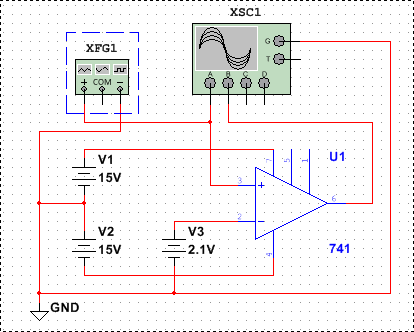

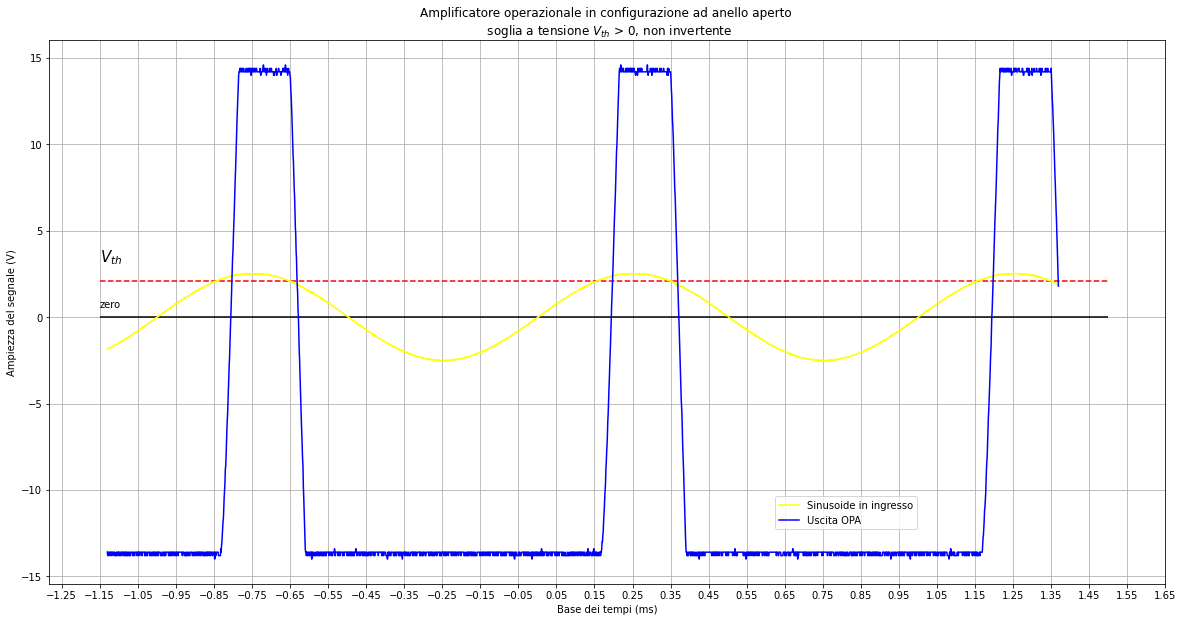

In [18]:
Vth = 2.1 # V

ch1_f = openTek(f'{DATADIR}/4-10-21/OPA_open_ring_biased_threshold/F0012CH1.CSV')
ch2_f = openTek(f'{DATADIR}/4-10-21/OPA_open_ring_biased_threshold/F0012CH2.CSV')

time1 = ch1_f['Data'].to_numpy().transpose()[0] * 1000
ch1   = ch1_f['Data'].to_numpy().transpose()[1]
time2 = ch2_f['Data'].to_numpy().transpose()[0] * 1000
ch2   = ch2_f['Data'].to_numpy().transpose()[1]

fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(time1, ch1, color = "yellow", label = "Sinusoide in ingresso")
ax.plot(time2, ch2, color = "blue", label = "Uscita OPA")

#ax.hlines(0, -1.15, 1.5, linestyle = "--", color="gray")

ax.set(xlabel='Base dei tempi (ms)', ylabel='Ampiezza del segnale (V)',
       title='Amplificatore operazionale in configurazione ad anello aperto \n soglia a tensione $V_{th}$ > 0, non invertente')

ax.text(-1.15, 4, '$V_{th}$',
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=15)

ax.text(-1.15, 1, 'zero',
        verticalalignment='top', horizontalalignment='left',
        color='black', fontsize=10)

ax.hlines(Vth, -1.15, 1.5, linestyle = "--", color='red')
ax.hlines(0, -1.15, 1.5, linestyle = "solid", color='black')

ax.set_xticks(np.arange(-1.25, 1.75, 0.1))

ax.grid()
ax.legend(loc=(0.65, 0.1))

plt.savefig(f"{OUTPUTDIR}/OPA-open-loop-biased_threshold.pdf")

In [19]:
ch2.min(), ch2.max()

(-14.0, 14.6)

In [20]:
high_thr = []

for index,value in enumerate(time2):
    if(value > 0.2 and value < 0.4):
        if(ch2[index] > 14.1):
            high_thr.append(ch2[index])

len(high_thr)

130

In [21]:
low_thr = []

for index,value in enumerate(time2):
    if(value > 0.4 and value < 1.2):
        if(ch2[index] < -13.5):
            low_thr.append(ch2[index])

len(low_thr)

766